In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df = train_df.drop('id',axis=1)
test_df = test_df.drop('id',axis=1)

In [5]:
len_train = len(train_df)
len_test = len(test_df)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               270000 non-null  int64  
 1   gender            270000 non-null  object 
 2   course            270000 non-null  object 
 3   study_hours       270000 non-null  float64
 4   class_attendance  270000 non-null  float64
 5   internet_access   270000 non-null  object 
 6   sleep_hours       270000 non-null  float64
 7   sleep_quality     270000 non-null  object 
 8   study_method      270000 non-null  object 
 9   facility_rating   270000 non-null  object 
 10  exam_difficulty   270000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 22.7+ MB


In [8]:
train_df_concate = train_df.drop('exam_score', axis=1) 

In [9]:
feature_to_drop = []
for col in test_df.columns:
    feature_to_drop.append(col)
    
feature = train_df.drop(feature_to_drop, axis=1)

In [10]:
all_data = pd.concat([train_df_concate, test_df])

In [11]:
for col in train_df.columns:
    print (f'{col} : {train_df[col].isna().sum()}')

age : 0
gender : 0
course : 0
study_hours : 0
class_attendance : 0
internet_access : 0
sleep_hours : 0
sleep_quality : 0
study_method : 0
facility_rating : 0
exam_difficulty : 0
exam_score : 0


In [12]:
for col in test_df.columns:
    print (f'{col} : {test_df[col].isna().sum()}')

age : 0
gender : 0
course : 0
study_hours : 0
class_attendance : 0
internet_access : 0
sleep_hours : 0
sleep_quality : 0
study_method : 0
facility_rating : 0
exam_difficulty : 0


In [13]:
all_data = pd.get_dummies(all_data, dtype=int)

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900000 entries, 0 to 269999
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   age                         900000 non-null  int64  
 1   study_hours                 900000 non-null  float64
 2   class_attendance            900000 non-null  float64
 3   sleep_hours                 900000 non-null  float64
 4   gender_female               900000 non-null  int64  
 5   gender_male                 900000 non-null  int64  
 6   gender_other                900000 non-null  int64  
 7   course_b.com                900000 non-null  int64  
 8   course_b.sc                 900000 non-null  int64  
 9   course_b.tech               900000 non-null  int64  
 10  course_ba                   900000 non-null  int64  
 11  course_bba                  900000 non-null  int64  
 12  course_bca                  900000 non-null  int64  
 13  course_diploma     

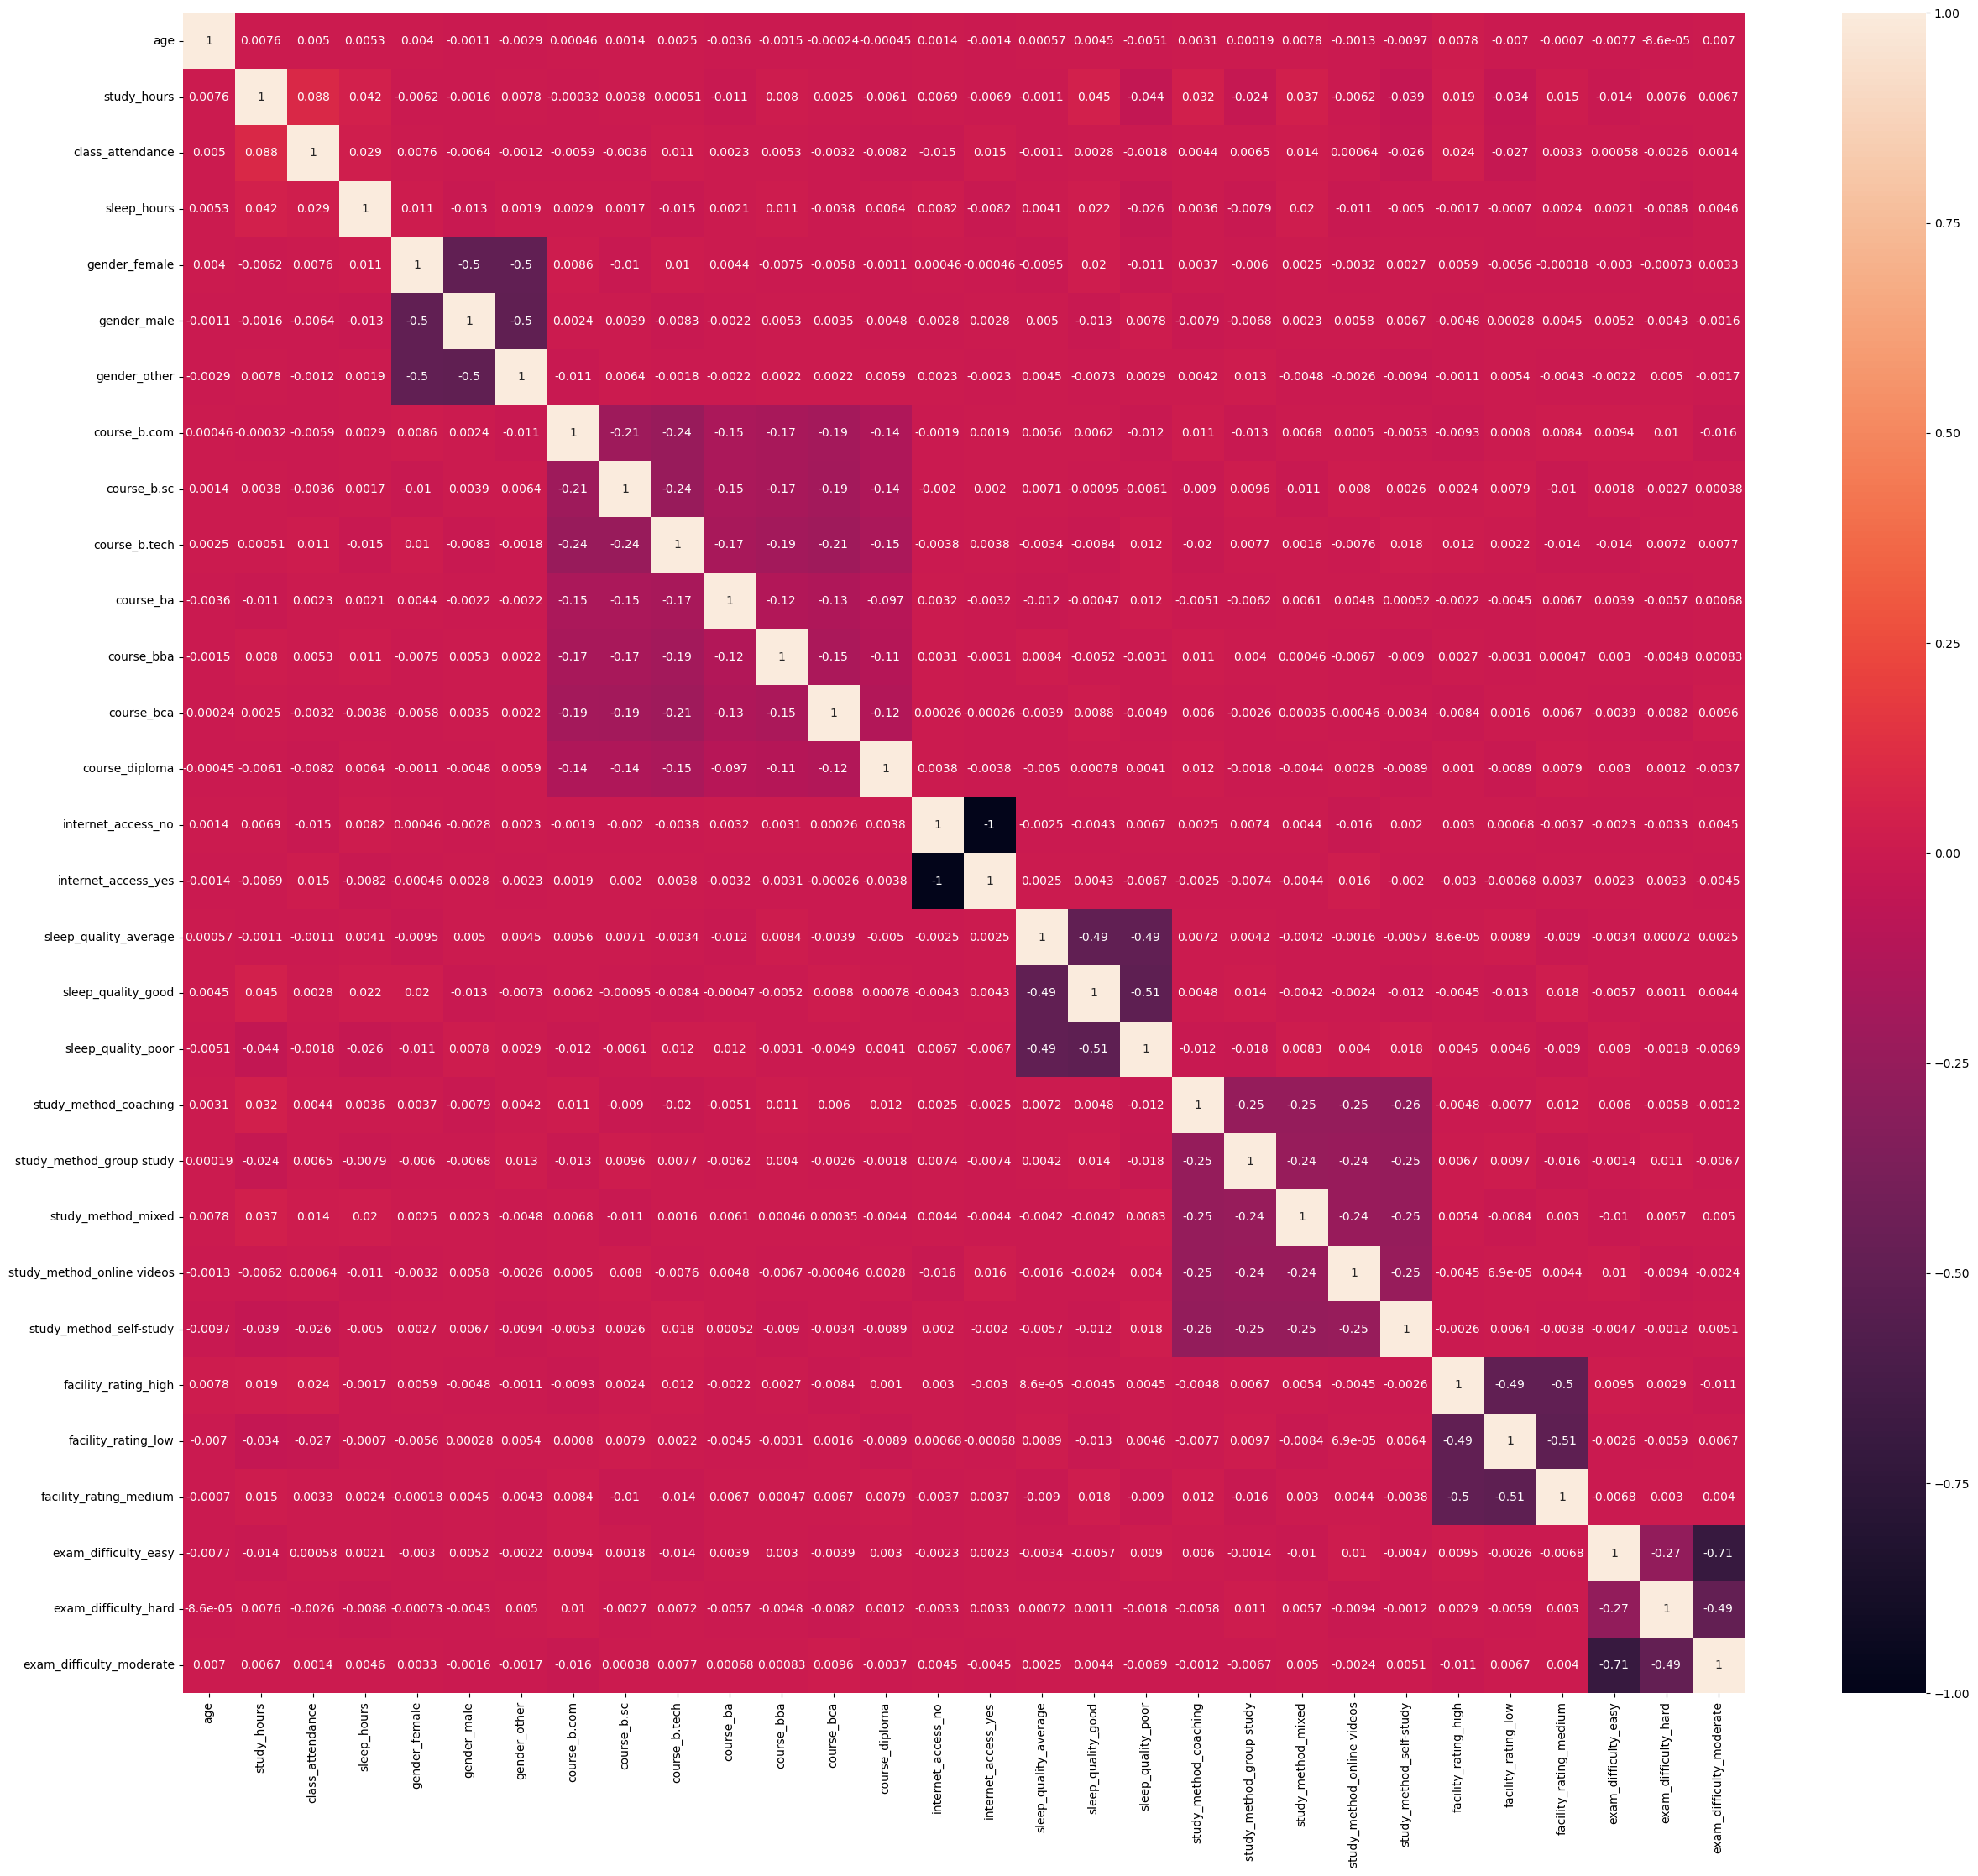

In [15]:
corr_matrix = all_data.corr()
plt.figure(figsize=(30,26))
sns.heatmap(corr_matrix, annot=True)
plt.show()

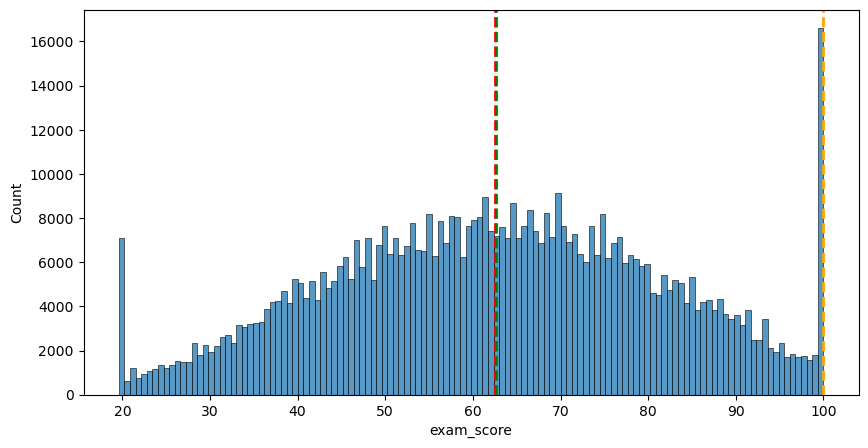

In [16]:
all_data_mean = train_df['exam_score'].mean()
all_data_median = train_df['exam_score'].median()
all_data_mode = train_df['exam_score'].mode()[0]

plt.figure(figsize=(10, 5))
plt.axvline(all_data_mean, color='red', linestyle= '--', linewidth=2)
plt.axvline(all_data_median, color='green', linestyle= '--',  linewidth=2)
plt.axvline(all_data_mode, color='orange', linestyle= '--',  linewidth=2)
sns.histplot(train_df['exam_score'])
plt.show()

In [17]:
X_train = all_data[:len_train].copy()
X_test = all_data[len_train:].copy()

In [18]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, feature, random_state=1)

In [21]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge(alpha=10.0))

In [22]:
lgb_model = LGBMRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=7, 
    num_leaves=31,
    force_row_wise=True, 
    verbose=-1
)

xgb_model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=7, 
    tree_method='hist',
    n_jobs=-1
)

cat_model = CatBoostRegressor(
    iterations=1000, 
    learning_rate=0.05, 
    depth=7, 
    thread_count=-1, 
    verbose=0
)

In [23]:
base_models = [
    ('ridge', ridge_pipe),
    ('lgb', lgb_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
]

In [24]:
voter = VotingRegressor(estimators=base_models, weights=[1, 3, 3, 3], n_jobs=-1)

In [25]:
feature = feature.values.ravel()
voter.fit(X_train, feature)

,estimators,"[('ridge', ...), ('lgb', ...), ...]"
,weights,"[1, 3, ...]"
,n_jobs,-1
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,10.0
,fit_intercept,True
,copy_X,True
,max_iter,None


In [38]:
preds = voter.predict(X_test)
preds = np.clip(preds, 0, 75)

test_ids = pd.read_csv('test.csv', usecols=['id'])['id']

submission = pd.DataFrame({
    'id': test_ids,
    'exam_score': preds_final
})

print("Средний балл:", submission['exam_score'].mean())

submission.to_csv('submission.csv', index=False)

Средний балл: 62.51804947066056
